In [106]:
import numpy as np
import pandas as pd

In [107]:
import datetime as datetime
df_index = pd.date_range('2012-10-01', periods=200, freq='1d')
df = pd.DataFrame(df_index, columns=['dt'])

x = np.linspace(0, 20, 200)

# stationary
df['val'] = np.sin(x) + np.random.normal(size=200, scale=0.5)

# non-stationary
#df['val'] = x/10 + np.sin(x) + np.random.normal(size=200, scale=0.5)

df.head()

,dt,val
0,2012-10-01,0.136552
1,2012-10-02,0.588397
2,2012-10-03,0.520173
3,2012-10-04,0.835181
4,2012-10-05,1.105535


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context='notebook')

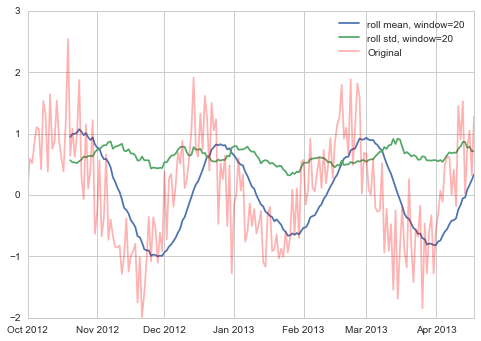

In [109]:
# check stationary

df_roll_mean = pd.rolling_mean(df.set_index('dt'), window=20)
df_roll_std = pd.rolling_std(df.set_index('dt'), window=20)
ax = plt.plot(df_roll_mean, label='roll mean, window=20')
plt.plot(df_roll_std, label='roll std, window=20')
plt.plot(df.set_index('dt'), color='r', label='Original', alpha=0.3)
#ax.set_title('Rolling mean and std')
plt.legend(loc='best')

In [110]:
# dickey fuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.val)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -3.753740
p-value                          0.003418
#Lags Used                      11.000000
Number of Observations Used    188.000000
Critical Value (5%)             -2.877040
Critical Value (1%)             -3.465620
Critical Value (10%)            -2.575032
dtype: float64


## Тест Дики-Фулера

Выдвигаем гипотезу, что ряд нестационарный. Дальше ищем единичные корни (_TODO: почитать, что это такое_). Если единичные корни есть, то p-value получится довольно большим (0.1 и более). В данном случае для стационарного ряда получаем $p = 0.003$ и меньше, для стационарного: $p=0.23$ и больше.